# Diagnosis Diabetes

## Business Understanding

1. Masalah Bisnis:
    - Mengingat tingginya ancaman komplikasi dan kematian akibat Diabetes Melitus, diperlukan solusi deteksi dini risiko yang lebih efisien dan akurat daripada metode kuesioner atau pemeriksaan medis rutin saat ini.
2. Tujuan Analisis/Bisnis :
    - Membangun, mengevaluasi, dan membandingkan model Machine Learning untuk klasifikasi deteksi awal risiko Diabetes Melitus.
3. Stakeholder :
    - Tenaga medis, peneliti kesehatan, kementerian kesehatan RI
4. Pertanyaan Kunci :    
    - Seberapa akurat model machine learning dapat memprediksi diabetes melitus?
    - Variabel mana yang paling berpengaruh untuk memprediksi diabetes melitus?
    - Dari beberapa model yang digunakan mana yang paling akurat dan optimal digunakan untuk memprediksi diagnisis diabetes melitus?
5. Metriks Sukses :
    - Tujuan analisis dianggap berhasil jika model mencapai ambang batas kinerja minimum pada Data Uji, seperti Akurasi  ≥ 80% dan Recall ≥ 75%.
    - Keberhasilan juga diukur dari identifikasi model yang konsisten superior di antara semuanya dan menunjukkan peningkatan kinerja yang signifikan.   
6. Batasan Sumber Daya :
    - Kuantitas data yang cukup kecil yaitu dibawah 1000 data raw.

## Data Understanding

1. Data yang dipakai untuk analisis dan membangun model ini adalah data yang diambil dari UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset
2. Data terdiri dari 17 Feature dan 520 row.
3. Kualitas data cukup baik degan 0 missing value tetapi memiliki data duplicate sebanyak 269.
4. Type data hanya 2 jenis yaitu integer pada 1 feature yaitu 'age' dan sisanya adalah object sebanyak 16

### Import Library

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.5 MB/s eta 0:00:00


In [2]:
# untuk manipulasi, visualisasi dan pengolahan data
import pandas as pd
from scipy.stats import uniform, randint # Untuk distribusi parameter acak
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# untuk standarisasi dan split dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# untuk membangun model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

# untuk hyperparameter tuning
from lightgbm import early_stopping
from lightgbm.callback import early_stopping # Import early_stopping directly
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# untuk mengevaluasi model menggunakan metriks
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib # untuk menyimpan model

### Load dataset

In [3]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [6]:
df.describe(include='object')

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [7]:
print("Data Duplicate")
print(df.duplicated().sum())
print()
print("Data Missing Value")
print(df.isnull().sum())
print()
print("Jumlah data Unik")
print(df.nunique())
print()
print("Jumlah data")
print(df.shape)

Data Duplicate
269

Data Missing Value
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Jumlah data Unik
Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

Jumlah data
(520, 17)


## Data Preprocessing

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(251, 17)

In [9]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 39.0
Q3: 58.0
IQR: 19.0
Lower Bound: 10.5
Upper Bound: 86.5


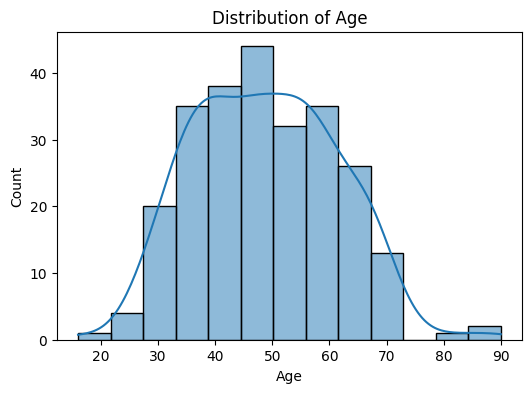

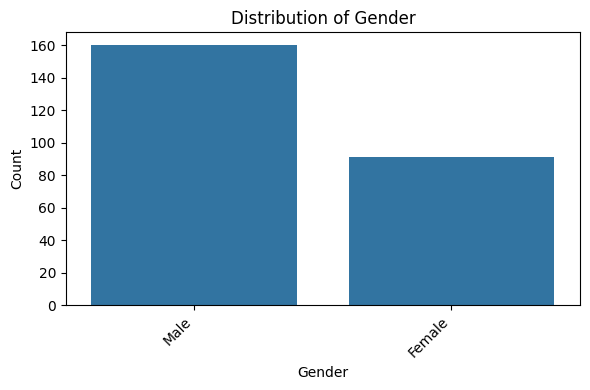

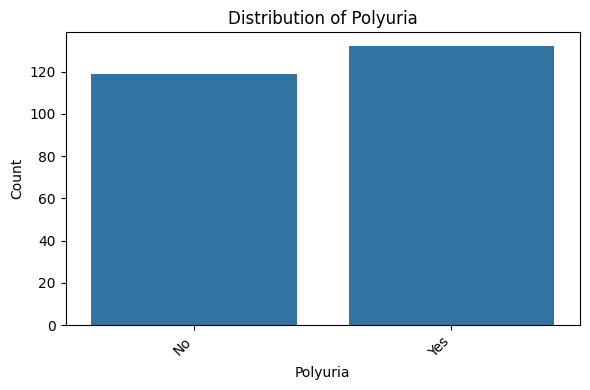

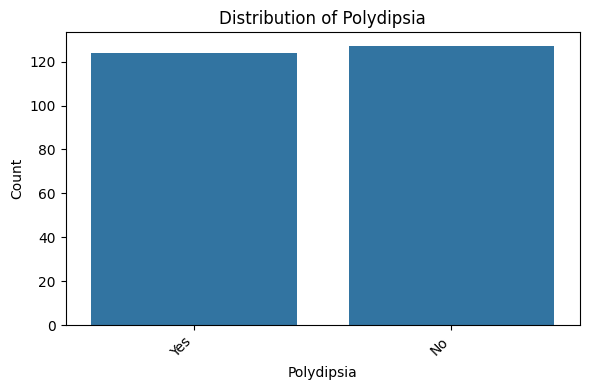

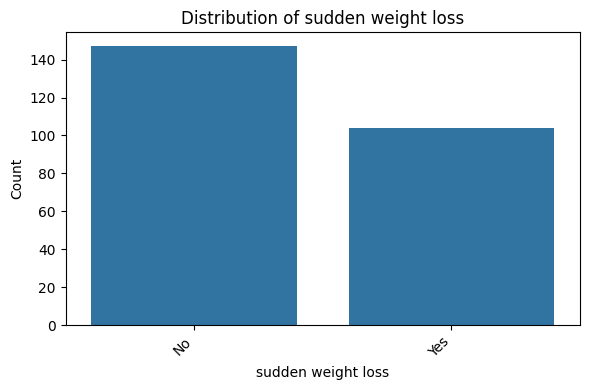

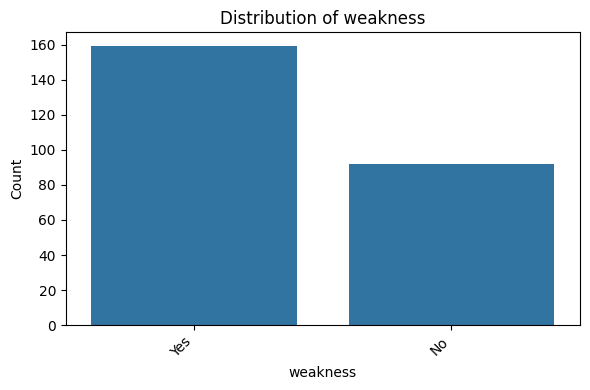

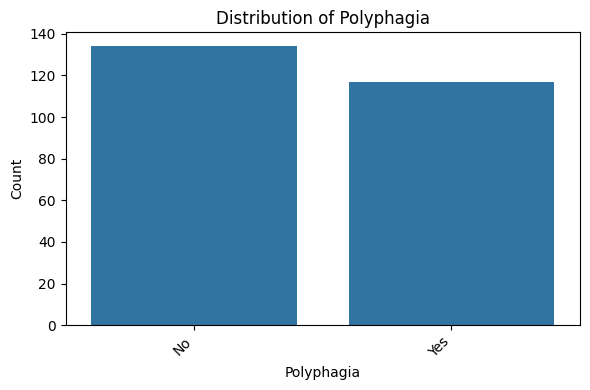

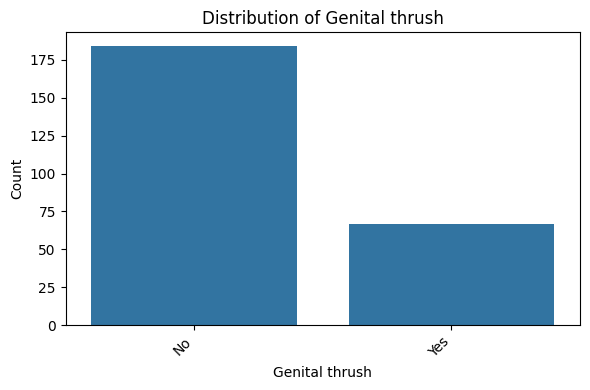

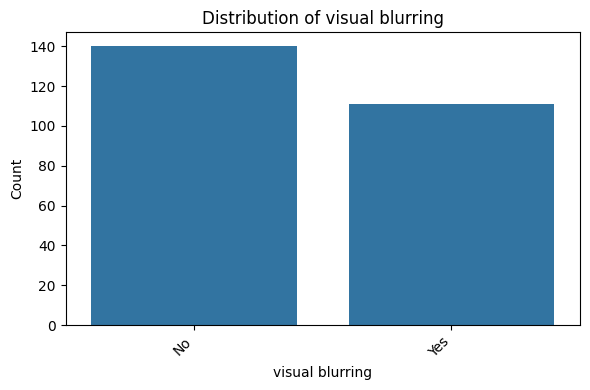

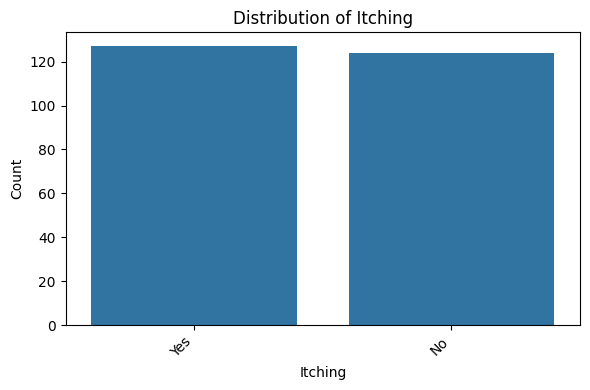

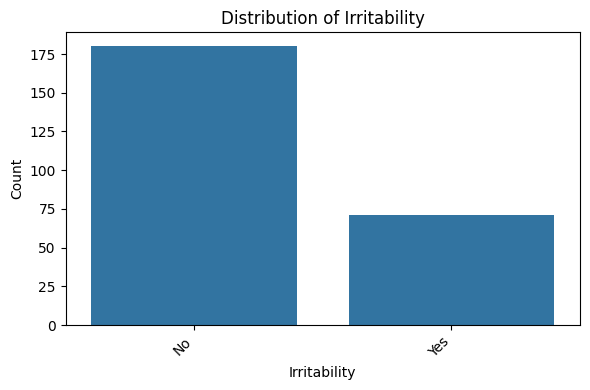

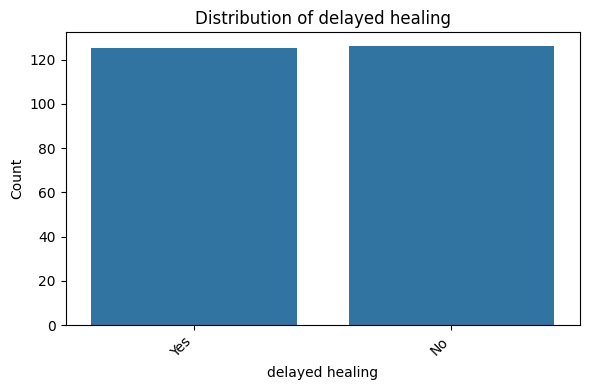

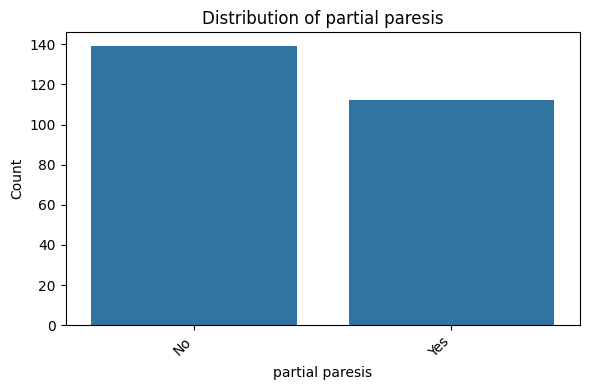

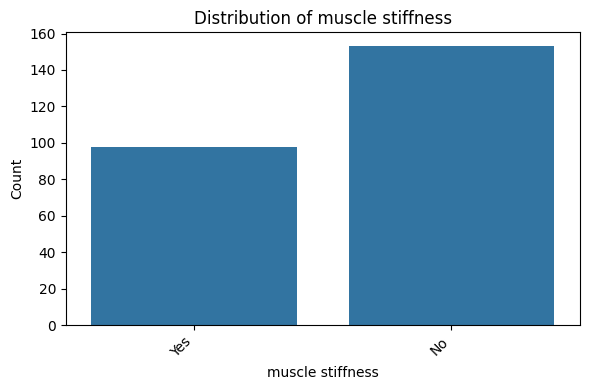

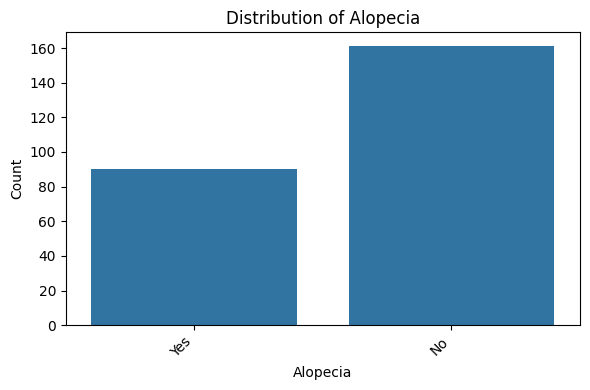

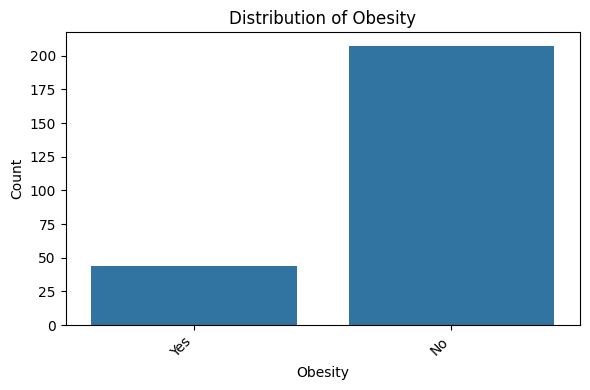

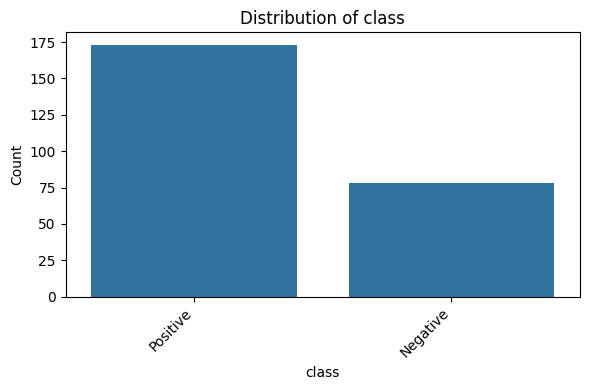

In [10]:
# Plot distribution for numerical features (Age)
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot distribution for categorical features
categorical_features = df.select_dtypes(include='object').columns

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

correlation_matrix = df_encoded.corr()

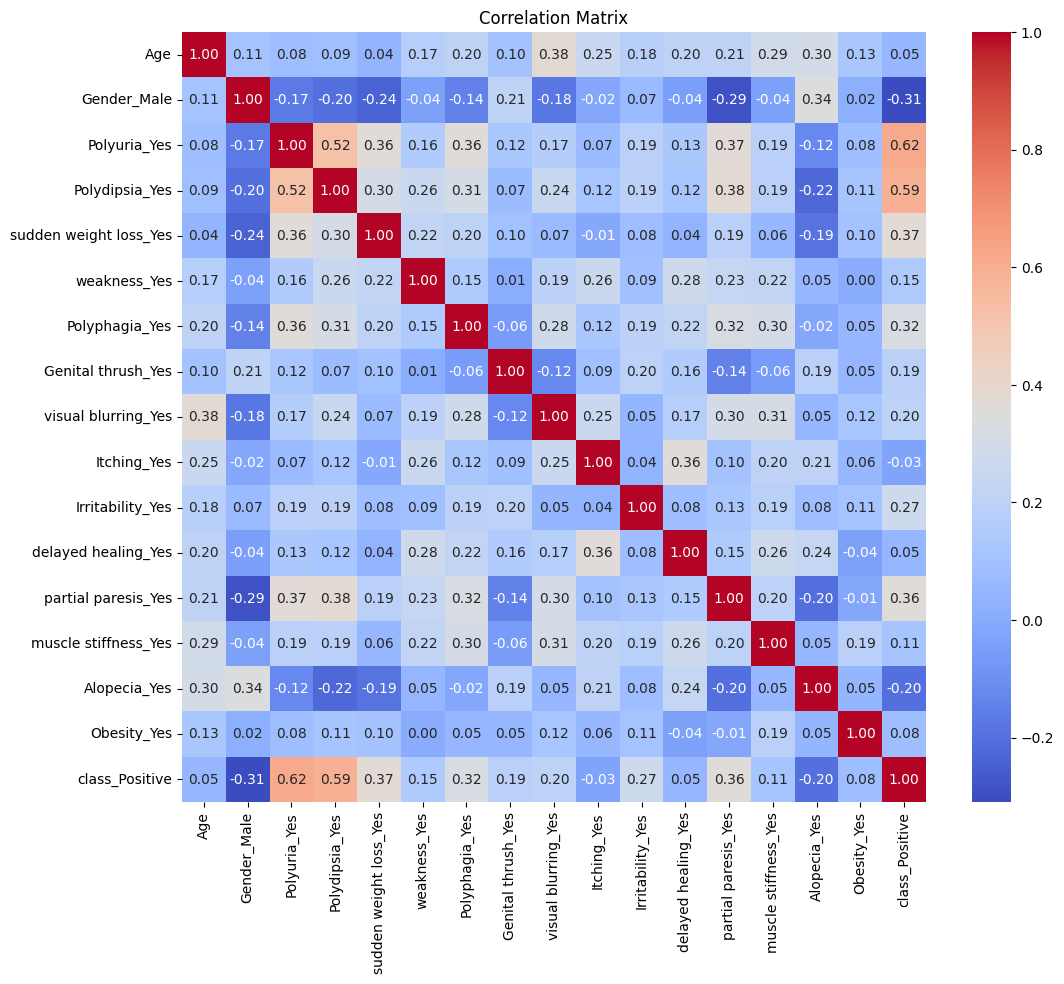

In [12]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

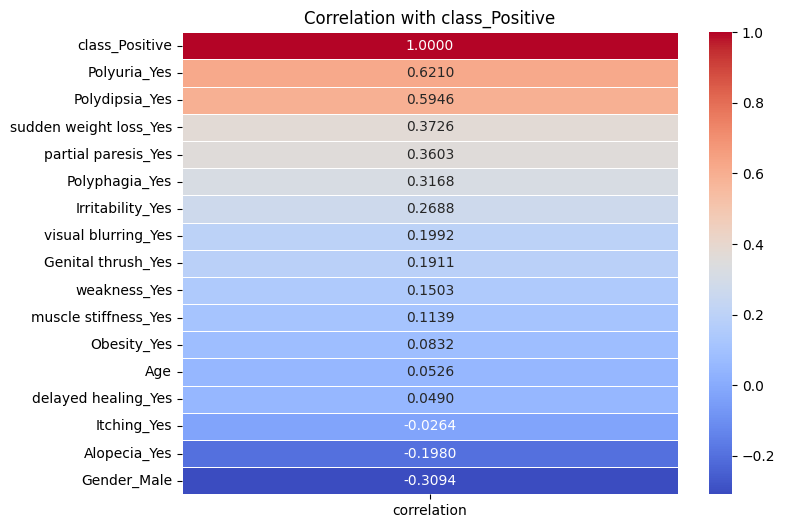

In [15]:
corr = df_encoded.corrwith(df_encoded['class_Positive']).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(corr , columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation with class_Positive')
plt.show()

In [73]:
scaler = StandardScaler()
df_encoded[['Age']] = scaler.fit_transform(df_encoded[['Age']])

In [74]:
df_encoded.to_csv('data_clean.csv', index=False)
df_encoded.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,-0.709103,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True
1,0.730775,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
2,-0.629110,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
3,-0.309137,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True
4,0.890761,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True


### Data Splitting

In [75]:
# Define features (X) and target (y)
X = df_encoded.drop('class_Positive', axis=1)
y = df_encoded['class_Positive']

# Split data into training and the rest (validation + testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the rest into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (200, 16)
Validation set shape: (25, 16)
Testing set shape: (26, 16)


## Build Model Gradient Boosting

### 1. Gradiend Boosting Machine (GBM)

In [76]:
gb_model = GradientBoostingClassifier(random_state=42, validation_fraction=(0.1))
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [77]:
y_pred_gb = gb_model.predict(X_test)

In [78]:
# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gb)
report = classification_report(y_test, y_pred_gb)
matrix = confusion_matrix(y_test, y_pred_gb)

print(f"Accuracy: {accuracy_gbm:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.90      0.95        10
        True       0.94      1.00      0.97        16

    accuracy                           0.96        26
   macro avg       0.97      0.95      0.96        26
weighted avg       0.96      0.96      0.96        26



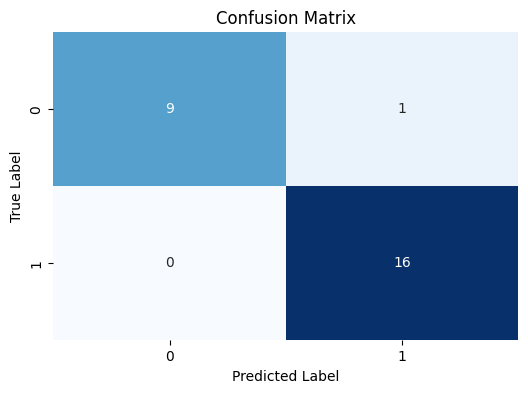

In [79]:
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 2. CatBoost

In [80]:
# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(random_state=42, verbose=100)

# Train the model using the training and validation sets
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val))

print(f"Pelatihan Selesai. Jumlah iterasi yang digunakan: {catboost_model.tree_count_}")

Learning rate set to 0.021294
0:	learn: 0.6751459	test: 0.6825850	best: 0.6825850 (0)	total: 9.85ms	remaining: 9.84s
100:	learn: 0.1368775	test: 0.2665480	best: 0.2665480 (100)	total: 289ms	remaining: 2.57s
200:	learn: 0.0634008	test: 0.2293211	best: 0.2293211 (200)	total: 569ms	remaining: 2.26s
300:	learn: 0.0362719	test: 0.2029954	best: 0.2024096 (299)	total: 836ms	remaining: 1.94s
400:	learn: 0.0243287	test: 0.1941890	best: 0.1928720 (389)	total: 1.16s	remaining: 1.73s
500:	learn: 0.0179499	test: 0.1911221	best: 0.1911221 (500)	total: 1.42s	remaining: 1.41s
600:	learn: 0.0142371	test: 0.1908356	best: 0.1901575 (594)	total: 1.67s	remaining: 1.11s
700:	learn: 0.0115909	test: 0.1893490	best: 0.1889489 (693)	total: 1.94s	remaining: 829ms
800:	learn: 0.0097519	test: 0.1898307	best: 0.1889489 (693)	total: 2.21s	remaining: 549ms
900:	learn: 0.0084255	test: 0.1889559	best: 0.1885766 (896)	total: 2.54s	remaining: 279ms
999:	learn: 0.0073818	test: 0.1907674	best: 0.1885766 (896)	total: 2.87s	

In [81]:
y_pred_catboost = catboost_model.predict(X_test)

In [82]:
# Evaluate the model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
report = classification_report(y_test, y_pred_catboost)
matrix = confusion_matrix(y_test, y_pred_catboost)

print(f"Accuracy: {accuracy_catboost:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.90      0.90        10
        True       0.94      0.94      0.94        16

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



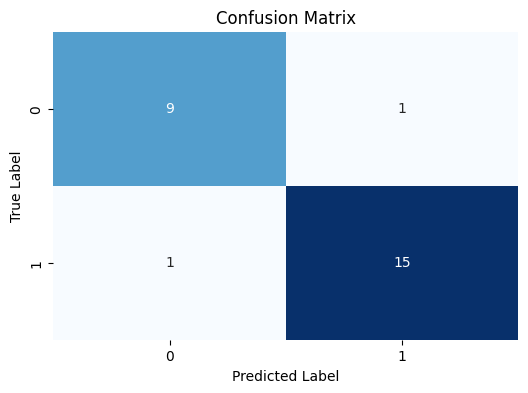

In [83]:
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 3. XGBoost

In [84]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model using the training and validation sets
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:10:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [85]:
y_pred_xgb = xgb_model.predict(X_test)

In [86]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"\nXGBoost Accuracy: {accuracy_xgb:.2f}")
print("XGBoost Classification Report:")
print(report_xgb)


XGBoost Accuracy: 0.92
XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.90      0.90        10
        True       0.94      0.94      0.94        16

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



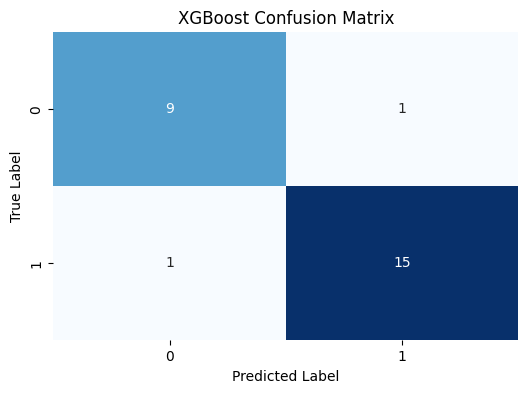

In [87]:
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 4. AdaBoost

In [88]:
# Initialize AdaBoost Classifier
adaboost_model = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [89]:
y_pred_adaboost = adaboost_model.predict(X_test)

In [90]:
# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
report_adaboost = classification_report(y_test, y_pred_adaboost)
matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

print(f"\nAdaBoost Accuracy: {accuracy_adaboost:.2f}")
print("AdaBoost Classification Report:")
print(report_adaboost)


AdaBoost Accuracy: 0.85
AdaBoost Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.70      0.78        10
        True       0.83      0.94      0.88        16

    accuracy                           0.85        26
   macro avg       0.85      0.82      0.83        26
weighted avg       0.85      0.85      0.84        26



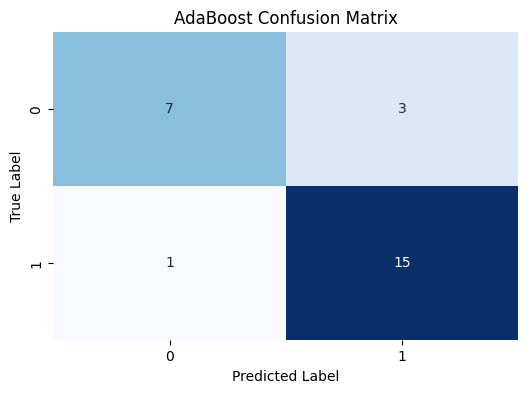

In [91]:
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 5. LightGBM

In [92]:
# Initialize LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)

# Define early stopping callback
early_stopping_callback = early_stopping(stopping_rounds=10, verbose=False)

# Train the model using the training and validation sets
lgbm_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[early_stopping_callback])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 138, number of negative: 62
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 16
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.690000 -> initscore=0.800119
[LightGBM] [Info] Start training from score 0.800119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier(random_state=42)

In [93]:
y_pred_lgbm = lgbm_model.predict(X_test)

In [94]:
# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)
matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

print(f"\nLightGBM Accuracy: {accuracy_lgbm:.2f}")
print("LightGBM Classification Report:")
print(report_lgbm)


LightGBM Accuracy: 0.92
LightGBM Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.90      0.90        10
        True       0.94      0.94      0.94        16

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



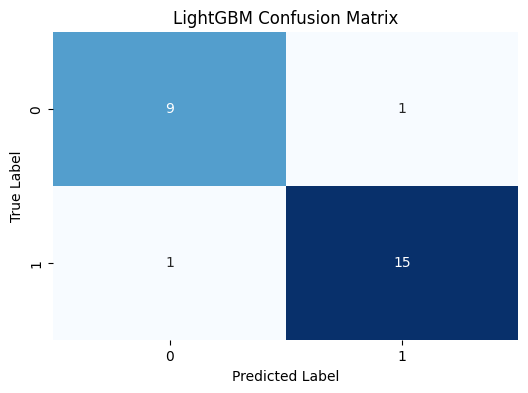

In [95]:
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_lgbm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Build Model K-Nearest Neighbors (KNN)

In [96]:
# Initialize KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors

# Train the model
knn_model.fit(X_train, y_train)

print("KNN model trained successfully!")

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

KNN model trained successfully!



KNN Accuracy: 0.88
KNN Classification Report:
              precision    recall  f1-score   support

       False       0.77      1.00      0.87        10
        True       1.00      0.81      0.90        16

    accuracy                           0.88        26
   macro avg       0.88      0.91      0.88        26
weighted avg       0.91      0.88      0.89        26



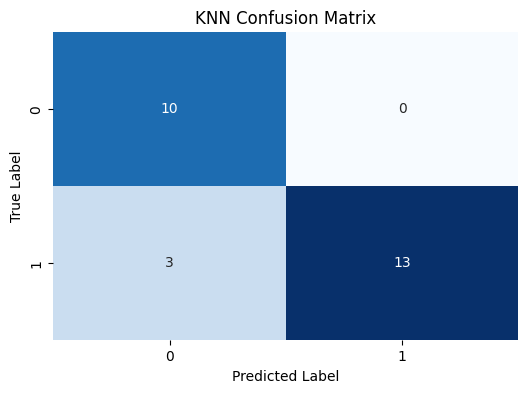

In [97]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"\nKNN Accuracy: {accuracy_knn:.2f}")
print("KNN Classification Report:")
print(report_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Fine Tuning untuk Model Gradient Boosting

#### 1. Gradient Boosting Machine

In [98]:
gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=3,
    n_jobs=-1
)

In [99]:
# Lakukan pencarian parameter terbaik pada data pelatihan
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=3)

In [100]:
# --- Hasil Fine-Tuning ---
print("\n--- Hasil Fine-Tuning yang Diperbaiki ---")
print("Parameter Terbaik:")
print(grid_search.best_params_)
print(f"Skor Akurasi Terbaik (CV): {grid_search.best_score_:.4f}")


--- Hasil Fine-Tuning yang Diperbaiki ---
Parameter Terbaik:
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 300}
Skor Akurasi Terbaik (CV): 0.9150


In [101]:
gb_model = grid_search.best_estimator_

# Evaluasi model terbaik pada data uji
y_pred_gb_tuned = gb_model.predict(X_test)
accuracy_gbm_tuned = accuracy_score(y_test, y_pred_gb_tuned)

print(f"\nAkurasi pada X_test (Tuned): {accuracy_gbm_tuned:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb_tuned))


Akurasi pada X_test (Tuned): 0.92
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.90      0.90        10
        True       0.94      0.94      0.94        16

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



####2. CatBoost

In [102]:
catboost_base = CatBoostClassifier(random_state=42,
                                    logging_level='Silent', # Matikan output log selama CV
                                    early_stopping_rounds=50) # Tambahkan ES agar lebih cepat

# Definisikan distribusi parameter yang akan dicoba (search space)
param_dist = {
    # Distribution untuk learning_rate (nilai acak antara 0.01 dan 0.3)
    'learning_rate': uniform(loc=0.01, scale=0.29),

    # Distribution untuk depth (kedalaman pohon, nilai integer antara 4 dan 10)
    'depth': randint(low=4, high=11),

    # Distribution untuk L2 Regularization (nilai acak)
    'l2_leaf_reg': uniform(loc=1, scale=5),

    # Jumlah iterasi/pohon (akan disetel secara otomatis oleh early stopping)
    'n_estimators': randint(low=100, high=1000),

    # Mengontrol persentase fitur yang digunakan pada setiap pembagian
    'rsm': uniform(loc=0.5, scale=0.5)
}

In [103]:
# Inisialisasi RandomizedSearchCV
# n_iter=20 berarti kita akan mencoba 20 kombinasi parameter secara acak
# cv=3 berarti 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=catboost_base,
    param_distributions=param_dist,
    n_iter=20, # Jumlah kombinasi parameter yang akan diuji
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1 # Gunakan semua core prosesor
)

In [104]:
# Lakukan pencarian parameter acak pada data pelatihan
print("Memulai Randomized Search untuk CatBoost. Proses ini mungkin memakan waktu...")
random_search.fit(X_train, y_train)

Memulai Randomized Search untuk CatBoost. Proses ini mungkin memakan waktu...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x79263adf7f80>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79263fd363c0>,
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79263fd340b0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79261953a1b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792619e4cf80>,
                                        'rsm': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79261957ede0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [105]:
# Dapatkan parameter terbaik
print("\nParameter Terbaik Ditemukan:")
print(random_search.best_params_)

# Dapatkan skor terbaik dari cross-validation
print(f"\nSkor Akurasi Terbaik (CV): {random_search.best_score_:.4f}")

# Dapatkan model terbaik
best_catboost_model = random_search.best_estimator_

# Karena CatBoost menggunakan early stopping, kita bisa melihat jumlah pohon optimal
print(f"Jumlah iterasi (pohon) optimal yang digunakan: {best_catboost_model.tree_count_}")


Parameter Terbaik Ditemukan:
{'depth': 6, 'l2_leaf_reg': np.float64(5.299702033681603), 'learning_rate': np.float64(0.2072891861904561), 'n_estimators': 940, 'rsm': np.float64(0.5325257964926398)}

Skor Akurasi Terbaik (CV): 0.9251
Jumlah iterasi (pohon) optimal yang digunakan: 940


In [106]:
# Prediksi pada data uji menggunakan model terbaik
y_pred_catboost_tuned = best_catboost_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_catboost_tuned = accuracy_score(y_test, y_pred_catboost_tuned)
report_tuned = classification_report(y_test, y_pred_catboost_tuned)
matrix_tuned = confusion_matrix(y_test, y_pred_catboost_tuned)

print("\n--- Hasil Evaluasi Model Terbaik (Tuned) ---")
print(f"Accuracy: {accuracy_catboost_tuned:.2f}")
print("Classification Report:")
print(report_tuned)


--- Hasil Evaluasi Model Terbaik (Tuned) ---
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.90      0.90        10
        True       0.94      0.94      0.94        16

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



####3.  **XGBoost**

In [107]:
xgb_model_base = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
)

In [108]:
param_dist = {
    # Jumlah pohon. Nilai yang lebih besar berarti waktu yang lebih lama.
    'n_estimators': [100, 200, 300, 500],

    # Laju pembelajaran. Nilai yang lebih kecil akan lebih akurat tetapi lebih lambat.
    'learning_rate': [0.01, 0.05, 0.1, 0.2],

    # Kedalaman maksimum pohon. Mengontrol kompleksitas.
    'max_depth': [3, 5, 7, 10],

    # Regularisasi L1 dan L2. Mencegah overfitting.
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],

    # Persentase sampel dan fitur per pohon.
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],

    # Min child weight. Mengontrol pemangkasan pohon.
    'min_child_weight': [1, 5, 10]
}

In [109]:
folds = 3
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

n_iter_search = 50
random_search = RandomizedSearchCV(
    estimator=xgb_model_base,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='accuracy',
    n_jobs=-1,
    cv=skf,
    verbose=2,
    random_state=42
)

In [110]:
print("Memulai RandomizedSearchCV untuk fine-tuning XGBoost")

random_search.fit(X_train, y_train)
print("Pencarian selesai.")

print("Hasil Fine-Tuning")
print("==============================================")
print(f"Hyperparameter Terbaik: {random_search.best_params_}")
print(f"Skor Cross-Validation Terbaik (Accuracy): {random_search.best_score_:.4f}")

Memulai RandomizedSearchCV untuk fine-tuning XGBoost
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Pencarian selesai.
Hasil Fine-Tuning
Hyperparameter Terbaik: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Skor Cross-Validation Terbaik (Accuracy): 0.9253


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:18:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [111]:
xgb_best = random_search.best_estimator_
y_pred_tuned = xgb_best.predict(X_test)

# Evaluasi
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)
matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print(f"\nModel XGBoost Terbaik (Tuned) Akurasi pada X_test: {accuracy_xgb_tuned:.4f}")
print("\nClassification Report Model Terbaik:")
print(report_tuned)


Model XGBoost Terbaik (Tuned) Akurasi pada X_test: 0.9231

Classification Report Model Terbaik:
              precision    recall  f1-score   support

       False       1.00      0.80      0.89        10
        True       0.89      1.00      0.94        16

    accuracy                           0.92        26
   macro avg       0.94      0.90      0.92        26
weighted avg       0.93      0.92      0.92        26



####4. AdaBoost

In [112]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

adaboost_model_base = AdaBoostClassifier(
    estimator=base_estimator,
    random_state=42
)

param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 1.5],
    'estimator__max_depth': [1, 2, 3]
}

folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

n_iter_search = 30
random_search_ada = RandomizedSearchCV(
    estimator=adaboost_model_base,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='accuracy',
    n_jobs=-1,
    cv=skf,
    verbose=2,
    random_state=42
)

In [113]:
print("Memulai RandomizedSearchCV untuk fine-tuning AdaBoost")

random_search_ada.fit(X_train, y_train)
print("Pencarian selesai.")

print("Hasil Fine-Tuning AdaBoost")
print("==============================================")
print(f"Hyperparameter Terbaik: {random_search_ada.best_params_}")
print(f"Skor Cross-Validation Terbaik (Accuracy): {random_search_ada.best_score_:.4f}")

Memulai RandomizedSearchCV untuk fine-tuning AdaBoost
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Pencarian selesai.
Hasil Fine-Tuning AdaBoost
Hyperparameter Terbaik: {'n_estimators': 100, 'learning_rate': 0.5, 'estimator__max_depth': 3}
Skor Cross-Validation Terbaik (Accuracy): 0.9300


In [114]:
adaboost_best = random_search_ada.best_estimator_
y_pred_tuned = adaboost_best.predict(X_test)

# Evaluasi
accuracy_ada_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

print(f"\nModel AdaBoost Terbaik (Tuned) Akurasi pada X_test: {accuracy_ada_tuned:.4f}")
print("\nClassification Report Model Terbaik:")
print(report_tuned)


Model AdaBoost Terbaik (Tuned) Akurasi pada X_test: 0.8846

Classification Report Model Terbaik:
              precision    recall  f1-score   support

       False       0.89      0.80      0.84        10
        True       0.88      0.94      0.91        16

    accuracy                           0.88        26
   macro avg       0.89      0.87      0.88        26
weighted avg       0.88      0.88      0.88        26



#### 5. LightGBM

In [115]:
lgbm_model_base = LGBMClassifier(
    objective='binary',
    random_state=42,
    n_estimators=10000,
    metric='logloss'
)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [5, 7, 10, 15, 20, -1],
    'num_leaves': np.arange(20, 100, 20),
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'min_child_samples': [10, 20, 50, 100],
}

folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

n_iter_search = 50

random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model_base,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='accuracy',
    n_jobs=-1,
    cv=skf,
    verbose=1,
    random_state=42,
    refit=True # Refit model terbaik pada seluruh data pelatihan setelah pencarian
)

In [116]:
print("Memulai RandomizedSearchCV untuk fine-tuning LightGBM...")

random_search_lgbm.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='logloss',
    callbacks=[early_stopping(stopping_rounds=50, verbose=False)],
)
print("Pencarian selesai.")

Memulai RandomizedSearchCV untuk fine-tuning LightGBM...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 138, number of negative: 62
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 16
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.690000 -> initscore=0.800119
[LightGBM] [Info] Start training from score 0.800119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [117]:
print("Hasil Fine-Tuning LightGBM")
print("==============================================")
print(f"Hyperparameter Terbaik: {random_search_lgbm.best_params_}")
print(f"Skor Cross-Validation Terbaik (Accuracy): {random_search_lgbm.best_score_:.4f}")

Hasil Fine-Tuning LightGBM
Hyperparameter Terbaik: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0, 'num_leaves': np.int64(40), 'min_child_samples': 10, 'max_depth': 20, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
Skor Cross-Validation Terbaik (Accuracy): 0.9100


In [118]:
# 7. Evaluasi Model Terbaik pada Data Uji (X_test)
lgbm_best = random_search_lgbm.best_estimator_
y_pred_tuned = lgbm_best.predict(X_test)

# Evaluasi
accuracy_light_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

print(f"\nModel LightGBM Terbaik (Tuned) Akurasi pada X_test: {accuracy_light_tuned:.4f}")
print("\nClassification Report Model Terbaik:")
print(report_tuned)


Model LightGBM Terbaik (Tuned) Akurasi pada X_test: 0.8846

Classification Report Model Terbaik:
              precision    recall  f1-score   support

       False       1.00      0.70      0.82        10
        True       0.84      1.00      0.91        16

    accuracy                           0.88        26
   macro avg       0.92      0.85      0.87        26
weighted avg       0.90      0.88      0.88        26



## Fine Tuning untuk model KNN

### 1. KNN (KNeighbors)

In [119]:
knn_model_base = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': np.arange(1, 21, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # p=1 (Manhattan Distance), p=2 (Euclidean Distance)
}

folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

grid_search_knn = GridSearchCV(
    estimator=knn_model_base,
    param_grid=param_grid_knn,
    scoring='accuracy',
    n_jobs=-1,
    cv=skf,
    verbose=1
)

print("Memulai GridSearchCV untuk fine-tuning KNN...")

grid_search_knn.fit(X_train, y_train)
print("Pencarian selesai.")

Memulai GridSearchCV untuk fine-tuning KNN...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Pencarian selesai.


In [120]:
print("Hasil Fine-Tuning KNN Terbaik")
print("==============================================")
print(f"Hyperparameter Terbaik: {grid_search_knn.best_params_}")
print(f"Skor Cross-Validation Terbaik (Accuracy): {grid_search_knn.best_score_:.4f}")

Hasil Fine-Tuning KNN Terbaik
Hyperparameter Terbaik: {'n_neighbors': np.int64(1), 'p': 1, 'weights': 'uniform'}
Skor Cross-Validation Terbaik (Accuracy): 0.8950


In [121]:
knn_best = grid_search_knn.best_estimator_
y_pred_tuned_knn = knn_best.predict(X_test)

accuracy_tuned_knn = accuracy_score(y_test, y_pred_tuned_knn)
report_tuned_knn = classification_report(y_test, y_pred_tuned_knn)

print(f"\nModel KNN Terbaik (Tuned) Akurasi pada X_test: {accuracy_tuned_knn:.4f}")
print("Classification Report Model Terbaik (KNN):")
print(report_tuned_knn)


Model KNN Terbaik (Tuned) Akurasi pada X_test: 0.9615
Classification Report Model Terbaik (KNN):
              precision    recall  f1-score   support

       False       1.00      0.90      0.95        10
        True       0.94      1.00      0.97        16

    accuracy                           0.96        26
   macro avg       0.97      0.95      0.96        26
weighted avg       0.96      0.96      0.96        26



### RNC (RadiusNeighbors)

In [122]:
rnc_model = RadiusNeighborsClassifier(outlier_label='most_frequent')

param_grid_rnc = {
    'radius': np.linspace(0.5, 2.0, 10),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_rnc = GridSearchCV(
    estimator=rnc_model,
    param_grid=param_grid_rnc,
    scoring='accuracy',
    n_jobs=-1,
    cv=skf, # Menggunakan StratifiedKFold yang sama
    verbose=1
)

print("\nMemulai GridSearchCV untuk Radius Neighbors Classifier")
grid_search_rnc.fit(X_train, y_train)
print("Pencarian selesai.")


Memulai GridSearchCV untuk Radius Neighbors Classifier
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Pencarian selesai.


In [123]:
print("Hasil Fine-Tuning Radius Neighbors Classifier Terbaik")
print("==============================================")
print(f"Hyperparameter Terbaik: {grid_search_rnc.best_params_}")
print(f"Skor Cross-Validation Terbaik (Accuracy): {grid_search_rnc.best_score_:.4f}")

Hasil Fine-Tuning Radius Neighbors Classifier Terbaik
Hyperparameter Terbaik: {'p': 2, 'radius': np.float64(1.6666666666666665), 'weights': 'distance'}
Skor Cross-Validation Terbaik (Accuracy): 0.9200


In [124]:
rnc_best = grid_search_rnc.best_estimator_
y_pred_tuned_rnc = rnc_best.predict(X_test)

accuracy_tuned_rnc = accuracy_score(y_test, y_pred_tuned_rnc)
report_tuned_rnc = classification_report(y_test, y_pred_tuned_rnc)

print(f"\nModel Radius Neighbors Terbaik (Tuned) Akurasi pada X_test: {accuracy_tuned_rnc:.4f}")
print("Classification Report Model Terbaik (RNC):")
print(report_tuned_rnc)


Model Radius Neighbors Terbaik (Tuned) Akurasi pada X_test: 0.9231
Classification Report Model Terbaik (RNC):
              precision    recall  f1-score   support

       False       0.83      1.00      0.91        10
        True       1.00      0.88      0.93        16

    accuracy                           0.92        26
   macro avg       0.92      0.94      0.92        26
weighted avg       0.94      0.92      0.92        26



In [125]:
# Get predicted probabilities for the positive class (class_Positive)
y_prob_catboost = catboost_model.predict_proba(X_test)[:, 1]
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_prob_adaboost = adaboost_model.predict_proba(X_test)[:, 1]
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
y_prob_rnc = rnc_best.predict_proba(X_test)[:, 1]

In [126]:
# Calculate ROC curve and AUC for each model
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_prob_catboost)
auc_catboost = roc_auc_score(y_test, y_prob_catboost)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_prob_adaboost)
auc_adaboost = roc_auc_score(y_test, y_prob_adaboost)

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)

fpr_rnc, tpr_rnc, _ = roc_curve(y_test, y_prob_rnc)
auc_rnc = roc_auc_score(y_test, y_prob_rnc)

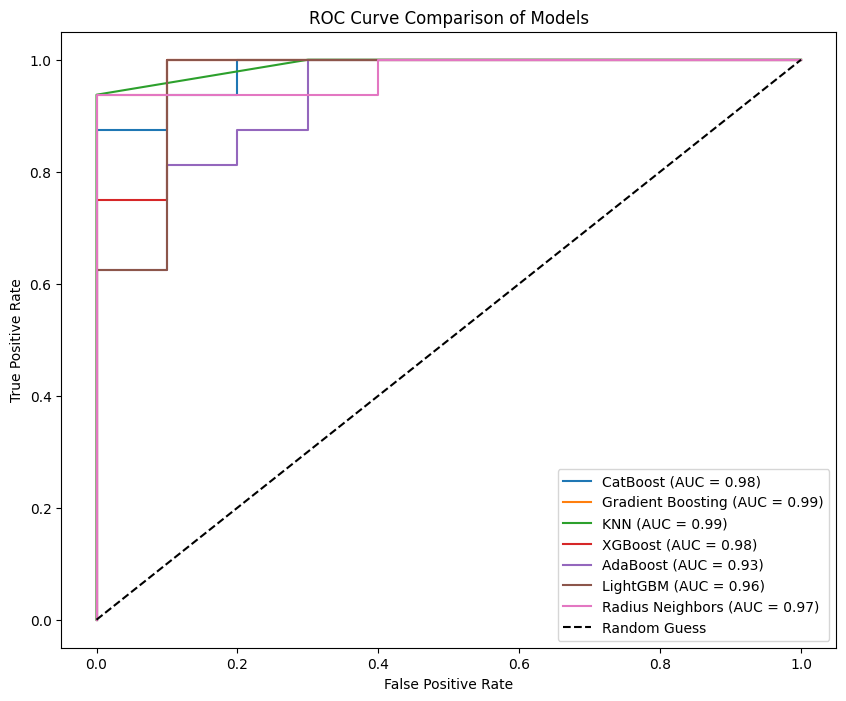

In [127]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {auc_catboost:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {auc_adaboost:.2f})')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {auc_lgbm:.2f})')
plt.plot(fpr_rnc, tpr_rnc, label=f'Radius Neighbors (AUC = {auc_rnc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models')
plt.legend()
plt.show()

In [128]:
# Summarize performance metrics
performance_summary = pd.DataFrame({
    'Model': ['CatBoost', 'GBM', 'KNN', 'XGBoost', 'AdaBoost', 'LightGBM'],
    'Accuracy': [accuracy_catboost, accuracy_gbm, accuracy_knn, accuracy_xgb, accuracy_adaboost, accuracy_lgbm],
    'Recall (Positive)': [classification_report(y_test, y_pred_catboost, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_gb, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_knn, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_xgb, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_adaboost, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_lgbm, output_dict=True)['True']['recall']],
    'Precision (Positive)': [classification_report(y_test, y_pred_catboost, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_gb, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_knn, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_xgb, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_adaboost, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_lgbm, output_dict=True)['True']['precision']],
    'AUC': [auc_catboost, auc_gb , auc_knn, auc_xgb, auc_adaboost, auc_lgbm]
})

print("\nPerformance Summary of Models:")
display(performance_summary)


Performance Summary of Models:


,Model,Accuracy,Recall (Positive),Precision (Positive),AUC
0,CatBoost,0.923077,0.9375,0.937500,0.981250
1,GBM,0.961538,1.0000,0.941176,0.993750
2,KNN,0.884615,0.8125,1.000000,0.990625
3,XGBoost,0.923077,0.9375,0.937500,0.975000
4,AdaBoost,0.846154,0.9375,0.833333,0.931250
5,LightGBM,0.923077,0.9375,0.937500,0.962500


In [129]:
# Summarize performance metrics for TUNED models
performance_summary_tuned = pd.DataFrame({
    'Model': ['CatBoost (Tuned)', 'GBM (Tuned)', 'KNN (Tuned)', 'XGBoost (Tuned)', 'AdaBoost (Tuned)', 'LightGBM (Tuned)', 'RNC (Tuned)'],
    'Accuracy': [accuracy_catboost_tuned, accuracy_gbm_tuned, accuracy_tuned_knn, accuracy_xgb_tuned, accuracy_ada_tuned, accuracy_light_tuned, accuracy_tuned_rnc],
    'Recall (Positive)': [classification_report(y_test, y_pred_catboost_tuned, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_gb_tuned, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_tuned_knn, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_tuned, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_tuned, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_tuned, output_dict=True)['True']['recall'],
                          classification_report(y_test, y_pred_tuned, output_dict=True)['True']['recall']],
    'Precision (Positive)': [classification_report(y_test, y_pred_catboost_tuned, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_gb_tuned, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_tuned_knn, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_tuned, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_tuned, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_tuned, output_dict=True)['True']['precision'],
                             classification_report(y_test, y_pred_tuned, output_dict=True)['True']['precision']],

    'AUC': [auc_catboost, auc_gb , auc_knn, auc_xgb, auc_adaboost, auc_lgbm, auc_rnc]
})

print("\nPerformance Summary of Tuned Models:")
display(performance_summary_tuned)


Performance Summary of Tuned Models:


,Model,Accuracy,Recall (Positive),Precision (Positive),AUC
0,CatBoost (Tuned),0.923077,0.9375,0.937500,0.981250
1,GBM (Tuned),0.923077,0.9375,0.937500,0.993750
2,KNN (Tuned),0.961538,1.0000,0.941176,0.990625
3,XGBoost (Tuned),0.923077,1.0000,0.842105,0.975000
4,AdaBoost (Tuned),0.884615,1.0000,0.842105,0.931250
5,LightGBM (Tuned),0.884615,1.0000,0.842105,0.962500
6,RNC (Tuned),0.923077,1.0000,0.842105,0.975000


## Inference Semua Model

In [130]:
# Make predictions using the TUNED models
y_pred_catboost_tuned = best_catboost_model.predict(X_test)
y_pred_gb_tuned = gb_model.predict(X_test) # Assuming gb_model is the tuned one after grid search
y_pred_knn_tuned = knn_best.predict(X_test)
y_pred_xgb_tuned = xgb_best.predict(X_test)
y_pred_adaboost_tuned = adaboost_best.predict(X_test)
y_pred_lgbm_tuned = lgbm_best.predict(X_test)
y_pred_rnc_tuned = rnc_best.predict(X_test)


comparison_df_tuned = pd.DataFrame({
    'Actual': y_test,
    'Catboost': y_pred_catboost_tuned,
    'GB': y_pred_gb_tuned,
    'KNN': y_pred_knn_tuned,
    'XGB': y_pred_xgb_tuned,
    'Ada': y_pred_adaboost_tuned,
    'Light' : y_pred_lgbm_tuned,
    'RNC' : y_pred_rnc_tuned
})

# Menampilkan tabel perbandingan
print("Perbandingan Nilai Aktual vs. Prediksi dari Semua Model (Tuned):")
display(comparison_df_tuned.head(20)) # Tampilkan 20 baris pertama untuk melihat pola

Perbandingan Nilai Aktual vs. Prediksi dari Semua Model (Tuned):


,Actual,Catboost,GB,KNN,XGB,Ada,Light,RNC
85,True,True,True,True,1,True,True,False
120,True,True,True,True,1,True,True,True
87,True,False,False,True,1,False,True,True
320,False,False,False,False,0,False,True,False
210,False,False,False,False,1,True,False,False
33,True,True,True,True,1,True,True,True
15,True,True,True,True,1,True,True,True
321,False,False,False,True,0,False,True,False
60,True,True,True,True,1,True,True,True
506,False,False,False,False,0,False,False,False


## Deploy Model Terbaik

In [131]:
# Save CatBoost model (using its specific method)
catboost_model.save_model('model_catboost.cbm') # CatBoost typically uses .cbm extension

# Save scikit-learn models using joblib
joblib.dump(gb_model, 'model_gb.joblib')
joblib.dump(knn_model, 'model_knn.joblib')

print("Models saved successfully!")

Models saved successfully!


##Conclusion

1. KNN ( setelah di Fine Tuning ) adalah model terbaik karena mencapai Akurasi tertinggi (0.961538) dan Recall sempurna (1.0000) dengan Precision yang tetap tinggi. Performa ini menunjukkan model yang paling efektif dalam mengidentifikasi kasus positif secara komprehensif tanpa mengorbankan Akurasi keseluruhan.

2. Feature paling berpengaruh pada model adalah fitur polyuria dan polydipsia

3. Model terbaik sebelum fine tuning adalah GBM dan di ikuti oleh catboost namun setelah fine tuning KNN berhasil menjadi peringkat pertama.

4. Penyebab utama penurunan akurasi model setelah fine-tuning adalah bahwa model awal kemungkinan besar overfitting pada data uji tunggal, sementara fine-tuning bertujuan menemukan model yang bergeneralisasi lebih baik meskipun skornya mungkin sedikit lebih rendah.

5. Urutan Model Terbaik Hingga Terburuk
Model diurutkan berdasarkan Akurasi (sebagai pengukur kinerja keseluruhan), kemudian Recall (penting untuk menangkap semua positif), dan terakhir AUC (untuk kemampuan diskriminatif).

| Peringkat | Model | Accuracy | Recall (Positive) | Precision (Positive) | AUC |
| :---: | :--- | :---: | :---: | :---: | :---: |
| 1 | **KNN (Tuned)** | **0.961538** | **1.0000** | 0.941176 | 0.990625 |
| 2 | **GBM (Tuned)** | 0.923077 | 0.9375 | 0.937500 | **0.993750** |
| 3 | **CatBoost (Tuned)** | 0.923077 | 0.9375 | 0.937500 | 0.981250 |
| 4 | **XGBoost (Tuned)** | 0.923077 | 1.0000 | 0.842105 | 0.975000 |
| 5 | **RNC (Tuned)** | 0.923077 | 1.0000 | 0.842105 | 0.975000 |
| 6 | **LightGBM (Tuned)** | 0.884615 | 1.0000 | 0.842105 | 0.962500 |
| 7 | **AdaBoost (Tuned)** | 0.884615 | 1.0000 | 0.842105 | 0.931250 |

